/tmp/ipykernel_3792/2063095300.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.figure.show()


Chance of winning: 0.13
Mean game length: 0.51 rolls
Median game length: 1.0
Mode game length: 1


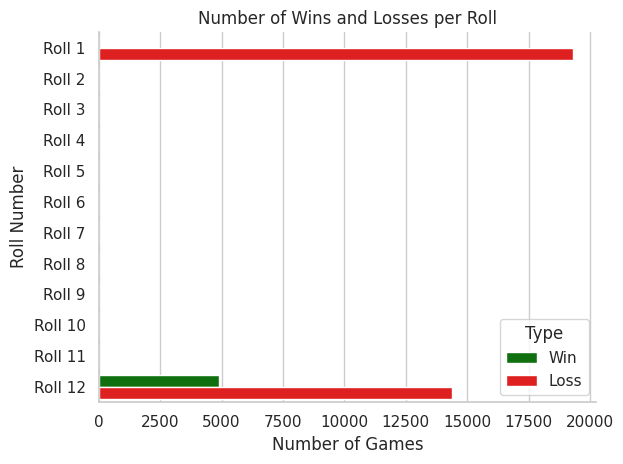

In [34]:
import random
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd

sys.argv = ['craps.py', '10000']

def roll_dice():
    """Roll two dice and return their face values as a tuple."""
    die1 = random.randrange(1, 7)
    die2 = random.randrange(1, 7)
    return (die1, die2) # pack die face values into a tuple
    
def display_dice(dice):
    """Display one roll of the two dice."""
    die1, die2 = dice # unpack the tuple into variables die1 and die2
    # print(f'Player rolled {die1} + {die2} = {sum(dice)}')

def play_game():
    """Simulate a single game of craps."""
    die_values = roll_dice() # first roll
    display_dice(die_values)
    sum_of_dice = sum(die_values)

    # track the rolls
    rolls = 1
    wins = 0
    losses = 0

    # determine game status and point, based on first roll
    if sum_of_dice in (7, 11): # win
        game_status = 'WON'
        wins += 1
    elif sum_of_dice in (2, 3, 12): # lose
        game_status = 'LOST'
        losses += 1
    else: # remember point
        game_status = 'CONTINUE'
        my_point = sum_of_dice
        # print('Point is', my_point)
    
    # continue rolling until player wins or loses
    while game_status == 'CONTINUE':
        die_values = roll_dice()
        display_dice(die_values)
        sum_of_dice = sum(die_values)
        rolls += 1
        
        if sum_of_dice == my_point: # win by making point
            game_status = 'WON'
            wins += 1
        elif sum_of_dice == 7: # lose by rolling 7
            game_status = 'LOST'
            losses += 1
            
    return wins, rolls, losses

def main():
    if len(sys.argv) != 2:
        print("Usage: python craps.py <number_of_games>")
        sys.exit(1)

    num_games = int(sys.argv[1])

     # Track wins and losses by roll number
    wins_per_roll = [0] * 12
    losses_per_roll = [0] * 12
    game_lengths = []

     # Simulate the games
    for _ in range(num_games):
        wins, losses, rolls = play_game()
        if rolls <= 12:
            wins_per_roll[rolls - 1] += wins
            losses_per_roll[rolls - 1] += losses
        else:
            wins_per_roll[11] += wins
            losses_per_roll[11] += losses
        game_lengths.append(rolls)

    # Prepare data for seaborn plot
    roll_labels = [f'Roll {i+1}' for i in range(12)]

    data = {
        "Roll": np.tile(roll_labels, 2),
        "Games": np.concatenate([wins_per_roll, losses_per_roll]),
        "Type": ["Win"] * 12 + ["Loss"] * 12
    }
    
    df = pd.DataFrame(data)

    # Plot using Seaborn
    sns.set(style="whitegrid")
    plot = sns.barplot(x="Games", y="Roll", hue="Type", data=df, palette=["green", "red"], orient="h")
    plot.set_title('Number of Wins and Losses per Roll')
    plot.set_xlabel('Number of Games')
    plot.set_ylabel('Roll Number')
    sns.despine()  # remove top and right borders
    
    plot.figure.tight_layout()  # Adjust layout
    plot.figure.show()

    # Calculate the chances of winning
    total_wins = sum(wins_per_roll)
    total_losses = sum(losses_per_roll)
    total_games = total_wins + total_losses
    chance_of_winning = total_wins / total_games if total_games > 0 else 0
    print(f'Chance of winning: {chance_of_winning:.2f}')

    # Calculate the mean, median, and mode of game lengths
    mean_length = np.mean(game_lengths)
    median_length = np.median(game_lengths)
    mode_length = Counter(game_lengths).most_common(1)[0][0]

    print(f'Mean game length: {mean_length:.2f} rolls')
    print(f'Median game length: {median_length}')
    print(f'Mode game length: {mode_length}')

    # Check if the chances of winning improve with the length of the game
    long_game_wins = sum(1 for length in game_lengths if length > 12 and wins_per_roll[11] > 0)
    long_game_total = sum(1 for length in game_lengths if length > 12)
    if long_game_total > 0:
        chance_of_winning_long_games = long_game_wins / long_game_total
        print(f'Chance of winning for games longer than 12 rolls: {chance_of_winning_long_games:.2f}')
    

if __name__ == "__main__":
    main()